# GameTheory 16c - Choix Social (Python)

**Navigation** : [<< 16-MechanismDesign (track principal)]([16-MechanismDesign](GameTheory-16-MechanismDesign.ipynb)) | [Index](README.md)

**Autres side tracks** : [16b-Lean-SocialChoice](GameTheory-16b-Lean-SocialChoice.ipynb)

**Kernel** : Python 3

---

## Introduction

Ce notebook compagnon du **notebook 20 (Lean)** fournit les **implementations Python** des concepts de choix social :

- Illustration du **paradoxe de Condorcet** (cycles de preferences)
- Comparaison des **regles de vote** (Pluralite, Borda, Copeland)
- L'exemple de **Lady Chatterley** (theoreme de Sen)
- Le **theoreme de l'electeur median** avec visualisation

Le notebook 20 Lean contient les **formalisations mathematiques**, celui-ci les **implementations pratiques**.

### Duree estimee : 35 minutes

In [1]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from itertools import permutations, combinations

print("Notebook Python compagnon pour le choix social")

Notebook Python compagnon pour le choix social


---

## 1. Paradoxe de Condorcet

Le **paradoxe de Condorcet** (1785) montre qu'avec le vote majoritaire pairwise, on peut obtenir des **cycles** dans les preferences collectives, meme si chaque individu a des preferences transitives.

$$A > B > C > A$$

In [2]:
def pairwise_majority(profile, x, y):
    """Calcule le resultat du vote majoritaire entre x et y."""
    x_wins = sum(1 for pref in profile if pref.index(x) < pref.index(y))
    y_wins = len(profile) - x_wins
    return x if x_wins > y_wins else (y if y_wins > x_wins else None)

def check_condorcet_cycle(profile, alternatives):
    """Verifie s'il y a un cycle de Condorcet."""
    results = {}
    for x, y in combinations(alternatives, 2):
        winner = pairwise_majority(profile, x, y)
        results[(x, y)] = winner
        print(f"  {x} vs {y}: {winner if winner else 'egalite'}")
    return results

# Profil de Condorcet classique
condorcet_profile = [
    ['A', 'B', 'C'],  # Individu 1: A > B > C
    ['B', 'C', 'A'],  # Individu 2: B > C > A
    ['C', 'A', 'B'],  # Individu 3: C > A > B
]

print("PROFIL DE CONDORCET (cycle)")
print("=" * 40)
for i, pref in enumerate(condorcet_profile):
    print(f"Individu {i+1}: {' > '.join(pref)}")

print("\nResultats pairwise:")
check_condorcet_cycle(condorcet_profile, ['A', 'B', 'C'])

print("\n=> CYCLE: A bat B, B bat C, C bat A!")

PROFIL DE CONDORCET (cycle)
Individu 1: A > B > C
Individu 2: B > C > A
Individu 3: C > A > B

Resultats pairwise:
  A vs B: A
  A vs C: C
  B vs C: B

=> CYCLE: A bat B, B bat C, C bat A!


---

## 2. Comparaison des Regles de Vote

Differentes regles de vote peuvent donner des resultats differents pour le meme profil.

In [3]:
def plurality_rule(profile):
    """Regle de la pluralite : l'alternative avec le plus de premiers choix gagne."""
    first_choices = [p[0] for p in profile]
    counts = Counter(first_choices)
    alternatives = set(sum(profile, []))
    return sorted(alternatives, key=lambda x: -counts.get(x, 0))

def borda_rule(profile):
    """Regle de Borda : points selon le rang."""
    scores = defaultdict(int)
    n = len(profile[0])
    for pref in profile:
        for rank, alt in enumerate(pref):
            scores[alt] += (n - 1 - rank)  # n-1 points pour le 1er, 0 pour le dernier
    return sorted(scores.keys(), key=lambda x: -scores[x])

def copeland_rule(profile):
    """Regle de Copeland : score = victoires pairwise - defaites."""
    alternatives = list(set(sum(profile, [])))
    scores = {a: 0 for a in alternatives}
    
    for x, y in combinations(alternatives, 2):
        winner = pairwise_majority(profile, x, y)
        if winner == x:
            scores[x] += 1
            scores[y] -= 1
        elif winner == y:
            scores[y] += 1
            scores[x] -= 1
    
    return sorted(alternatives, key=lambda x: -scores[x])

# Test avec le profil de Condorcet
print("COMPARAISON DES REGLES DE VOTE")
print("=" * 40)
print(f"\nPluralite: {' > '.join(plurality_rule(condorcet_profile))}")
print(f"Borda:     {' > '.join(borda_rule(condorcet_profile))}")
print(f"Copeland:  {' > '.join(copeland_rule(condorcet_profile))}")

print("\n=> Avec un profil cyclique, les resultats peuvent varier!")

COMPARAISON DES REGLES DE VOTE

Pluralite: C > A > B
Borda:     A > B > C
Copeland:  C > A > B

=> Avec un profil cyclique, les resultats peuvent varier!


### Analyse des resultats

Avec le profil de Condorcet (cycle A > B > C > A), les trois regles donnent des resultats differents :

| Regle | Classement | Principe |
|-------|------------|----------|
| **Pluralite** | C > A > B | Compte uniquement les premiers choix (1 chacun) |
| **Borda** | A > B > C | Points selon le rang (2 pts 1er, 1 pt 2e, 0 pt 3e) |
| **Copeland** | C > A > B | Score = victoires - defaites pairwise |

**Observations** :
- Pluralite et Copeland coincident ici, mais Borda differe
- Avec un profil cyclique, **aucune regle ne peut eviter l'arbitraire**
- La preuve du theoreme d'Arrow montre que ce probleme est inherent a toute regle d'agregation

> **Note** : Le choix de la regle de vote n'est pas neutre - il peut determiner le vainqueur dans les situations de preferences divisees.

In [4]:
# Exemple ou les regles donnent des resultats differents
divergent_profile = [
    ['A', 'B', 'C'],
    ['A', 'B', 'C'],
    ['B', 'C', 'A'],
    ['C', 'B', 'A'],
    ['C', 'B', 'A'],
]

print("PROFIL AVEC RESULTATS DIVERGENTS")
print("=" * 40)
for i, pref in enumerate(divergent_profile):
    print(f"Individu {i+1}: {' > '.join(pref)}")

print(f"\nPluralite: {' > '.join(plurality_rule(divergent_profile))}")
print(f"Borda:     {' > '.join(borda_rule(divergent_profile))}")
print(f"Copeland:  {' > '.join(copeland_rule(divergent_profile))}")

print("\n=> Meme profil, resultats differents selon la regle!")

PROFIL AVEC RESULTATS DIVERGENTS
Individu 1: A > B > C
Individu 2: A > B > C
Individu 3: B > C > A
Individu 4: C > B > A
Individu 5: C > B > A

Pluralite: C > A > B
Borda:     B > C > A
Copeland:  B > C > A

=> Meme profil, resultats differents selon la regle!


---

## 3. L'Exemple de Lady Chatterley (Theoreme de Sen)

Le **theoreme de Sen** (1970) montre un conflit entre **liberte individuelle** et **efficacite Pareto**.

In [5]:
print("L'EXEMPLE DE LADY CHATTERLEY")
print("=" * 50)
print("""
Deux individus : Prude (P) et Lewd (L)
Trois alternatives :
  a : Prude lit le livre
  b : Lewd lit le livre  
  c : Personne ne lit le livre

Preferences :
  Prude : c > a > b  (prefere que personne ne lise, mais si quelqu'un
                      doit lire, ce sera lui pour "proteger" Lewd)
  Lewd  : a > b > c  (prefere que Prude lise pour le choquer,
                      sinon il lira lui-meme)

Liberte minimale :
  - Prude decide entre a et c (lire ou non pour lui)
  - Lewd decide entre b et c (lire ou non pour lui)

Application :
  - Prude : c > a => socialement c > a
  - Lewd  : b > c => socialement b > c
  - Par transitivite : b > c > a, donc b > a

Mais Pareto :
  - Prude prefere a > b
  - Lewd prefere a > b
  - Tous preferent a > b => socialement a > b (Pareto)

CONTRADICTION : b > a et a > b simultanement!
""")

L'EXEMPLE DE LADY CHATTERLEY

Deux individus : Prude (P) et Lewd (L)
Trois alternatives :
  a : Prude lit le livre
  b : Lewd lit le livre  
  c : Personne ne lit le livre

Preferences :
  Prude : c > a > b  (prefere que personne ne lise, mais si quelqu'un
                      doit lire, ce sera lui pour "proteger" Lewd)
  Lewd  : a > b > c  (prefere que Prude lise pour le choquer,
                      sinon il lira lui-meme)

Liberte minimale :
  - Prude decide entre a et c (lire ou non pour lui)
  - Lewd decide entre b et c (lire ou non pour lui)

Application :
  - Prude : c > a => socialement c > a
  - Lewd  : b > c => socialement b > c
  - Par transitivite : b > c > a, donc b > a

Mais Pareto :
  - Prude prefere a > b
  - Lewd prefere a > b
  - Tous preferent a > b => socialement a > b (Pareto)

CONTRADICTION : b > a et a > b simultanement!



### Interpretation du theoreme de Sen

L'exemple illustre une **impossibilite fondamentale** : on ne peut pas simultanement respecter :
- La **liberte individuelle minimale** (chacun decide pour soi)
- L'**efficacite Pareto** (si tous preferent A a B, la societe aussi)

**Structure du conflit** :

| Principe | Implication | Resultat |
|----------|-------------|----------|
| Liberte Prude | c > a | c > a |
| Liberte Lewd | b > c | b > c |
| Transitivite | b > c > a | **b > a** |
| Pareto | Tous preferent a a b | **a > b** |

> **Portee philosophique** : Ce theoreme remet en question l'idee qu'on peut toujours reconcilier droits individuels et bien-etre collectif. Dans certaines situations, ces deux objectifs sont logiquement incompatibles.

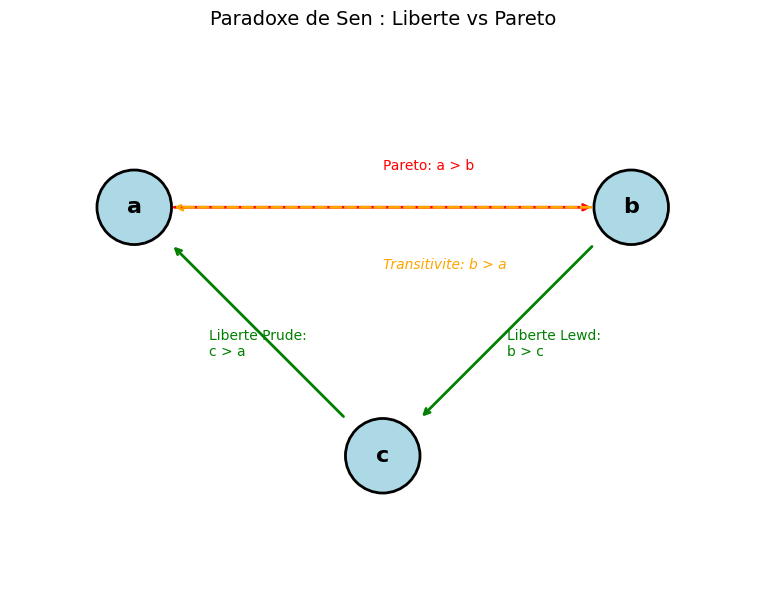

Rouge = Pareto, Vert = Liberte, Orange = Contradiction


In [6]:
# Visualisation du paradoxe de Sen
fig, ax = plt.subplots(figsize=(10, 6))

# Noeuds
positions = {'a': (0, 1), 'b': (2, 1), 'c': (1, 0)}

for label, (x, y) in positions.items():
    circle = plt.Circle((x, y), 0.15, color='lightblue', ec='black', lw=2)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=16, fontweight='bold')

# Aretes avec etiquettes
# Liberte Prude : c > a
ax.annotate('', xy=(0.15, 0.85), xytext=(0.85, 0.15),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.text(0.3, 0.4, 'Liberte Prude:\nc > a', fontsize=10, color='green')

# Liberte Lewd : b > c
ax.annotate('', xy=(1.15, 0.15), xytext=(1.85, 0.85),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.text(1.5, 0.4, 'Liberte Lewd:\nb > c', fontsize=10, color='green')

# Pareto : a > b
ax.annotate('', xy=(1.85, 1), xytext=(0.15, 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax.text(1, 1.15, 'Pareto: a > b', fontsize=10, color='red')

# Contradiction implicite : b > a par transitivite
ax.annotate('', xy=(0.15, 1), xytext=(1.85, 1),
            arrowprops=dict(arrowstyle='->', color='orange', lw=2, ls='--'))
ax.text(1, 0.75, 'Transitivite: b > a', fontsize=10, color='orange', style='italic')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.7)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("Paradoxe de Sen : Liberte vs Pareto", fontsize=14)

plt.tight_layout()
plt.show()

print("Rouge = Pareto, Vert = Liberte, Orange = Contradiction")

---

## 4. Theoreme de l'Electeur Median

Avec des **preferences unimodales** (single-peaked), le vote majoritaire fonctionne bien : l'alternative preferee de l'electeur median est le **vainqueur de Condorcet**.

In [7]:
def single_peaked_preference(peak, alternatives):
    """Genere une preference unimodale avec pic donne."""
    return sorted(alternatives, key=lambda x: abs(x - peak))

def find_median_voter(peaks):
    """Trouve l'electeur median."""
    sorted_peaks = sorted(peaks)
    return sorted_peaks[len(peaks) // 2]

def condorcet_winner_single_peaked(profile, alternatives):
    """Trouve le gagnant de Condorcet pour preferences unimodales."""
    for candidate in alternatives:
        beats_all = True
        for other in alternatives:
            if other != candidate:
                winner = pairwise_majority(profile, candidate, other)
                if winner != candidate:
                    beats_all = False
                    break
        if beats_all:
            return candidate
    return None

# Exemple : 7 electeurs avec preferences unimodales sur [0, 10]
alternatives = [0, 2, 4, 6, 8, 10]
voter_peaks = [1, 3, 4, 5, 7, 8, 9]  # 7 electeurs

# Generer les preferences
profile_sp = [single_peaked_preference(peak, alternatives) for peak in voter_peaks]

print("THEOREME DE L'ELECTEUR MEDIAN")
print("=" * 40)
print(f"Alternatives : {alternatives}")
print(f"Pics des electeurs : {voter_peaks}")
print(f"\nPreferences generees :")
for i, (peak, pref) in enumerate(zip(voter_peaks, profile_sp)):
    print(f"  Electeur {i+1} (pic={peak}): {pref}")

median_peak = find_median_voter(voter_peaks)
print(f"\nElecteur median : pic a {median_peak}")

# L'alternative la plus proche du median
median_choice = min(alternatives, key=lambda x: abs(x - median_peak))
print(f"Choix de l'electeur median : {median_choice}")

# Verifier que c'est le gagnant de Condorcet
condorcet = condorcet_winner_single_peaked(profile_sp, alternatives)
print(f"Gagnant de Condorcet : {condorcet}")
print(f"\n=> Theoreme verifie : {median_choice == condorcet}")

THEOREME DE L'ELECTEUR MEDIAN
Alternatives : [0, 2, 4, 6, 8, 10]
Pics des electeurs : [1, 3, 4, 5, 7, 8, 9]

Preferences generees :
  Electeur 1 (pic=1): [0, 2, 4, 6, 8, 10]
  Electeur 2 (pic=3): [2, 4, 0, 6, 8, 10]
  Electeur 3 (pic=4): [4, 2, 6, 0, 8, 10]
  Electeur 4 (pic=5): [4, 6, 2, 8, 0, 10]
  Electeur 5 (pic=7): [6, 8, 4, 10, 2, 0]
  Electeur 6 (pic=8): [8, 6, 10, 4, 2, 0]
  Electeur 7 (pic=9): [8, 10, 6, 4, 2, 0]

Electeur median : pic a 5
Choix de l'electeur median : 4
Gagnant de Condorcet : 4

=> Theoreme verifie : True


### Interpretation des resultats

Le theoreme de l'electeur median est verifie empiriquement : l'alternative **4** (la plus proche du pic median 5) est bien le **gagnant de Condorcet**.

**Mecanisme** :
- Avec des preferences unimodales, chaque electeur ordonne les alternatives par **distance croissante** a son pic
- L'electeur median (pic=5) divise l'electorat en deux moities
- Toute alternative plus proche du median bat toute alternative plus eloignee par majorite

| Electeur | Pic | Premier choix |
|----------|-----|---------------|
| 1-3 | 1, 3, 4 | Alternatives basses (0, 2, 4) |
| 4 (median) | **5** | **4** |
| 5-7 | 7, 8, 9 | Alternatives hautes (6, 8) |

> **Consequence pratique** : Lorsque les preferences sont unimodales (enjeu gauche-droite typique), le vote majoritaire est **stable** et evite le paradoxe de Condorcet.

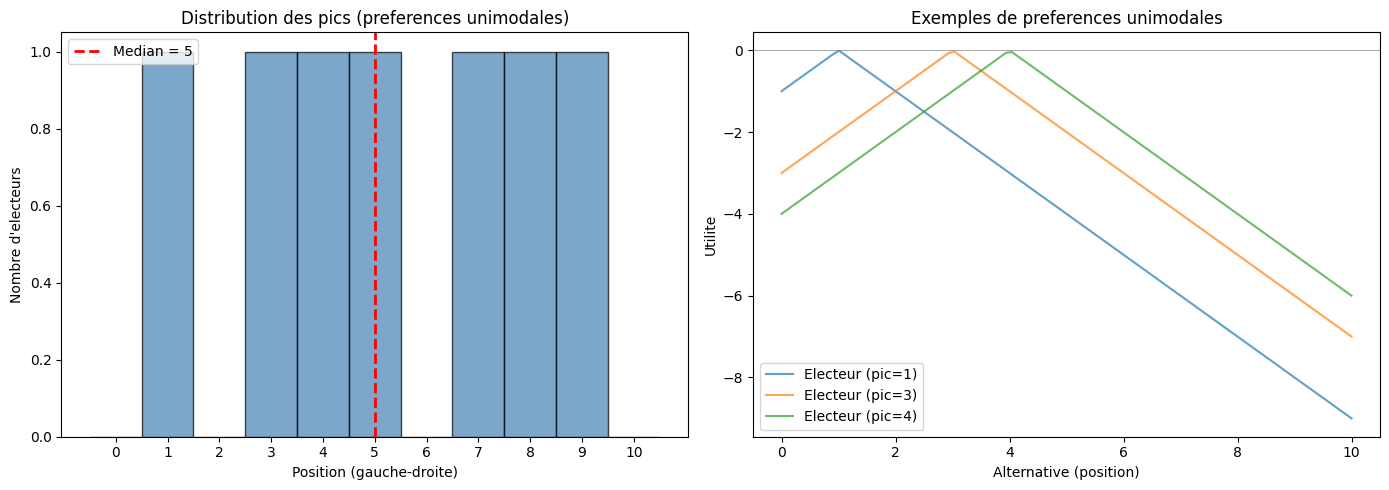

Avec des preferences unimodales, pas de cycle de Condorcet!


In [8]:
# Visualisation du theoreme de l'electeur median
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Distribution des pics
ax1.hist(voter_peaks, bins=range(0, 12), align='left', color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(median_peak, color='red', linestyle='--', linewidth=2, label=f'Median = {median_peak}')
ax1.set_xlabel('Position (gauche-droite)')
ax1.set_ylabel('Nombre d\'electeurs')
ax1.set_title('Distribution des pics (preferences unimodales)')
ax1.legend()
ax1.set_xticks(range(0, 11))

# Graphique 2 : Preferences unimodales
x_line = np.linspace(0, 10, 100)
for i, peak in enumerate(voter_peaks[:3]):  # Montrer 3 electeurs
    utility = -np.abs(x_line - peak)  # Utilite = - distance au pic
    ax2.plot(x_line, utility, label=f'Electeur (pic={peak})', alpha=0.7)

ax2.set_xlabel('Alternative (position)')
ax2.set_ylabel('Utilite')
ax2.set_title('Exemples de preferences unimodales')
ax2.legend()
ax2.axhline(0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Avec des preferences unimodales, pas de cycle de Condorcet!")

---

## 5. Implications Politiques

Le theoreme de l'electeur median a des implications importantes pour la competition electorale.

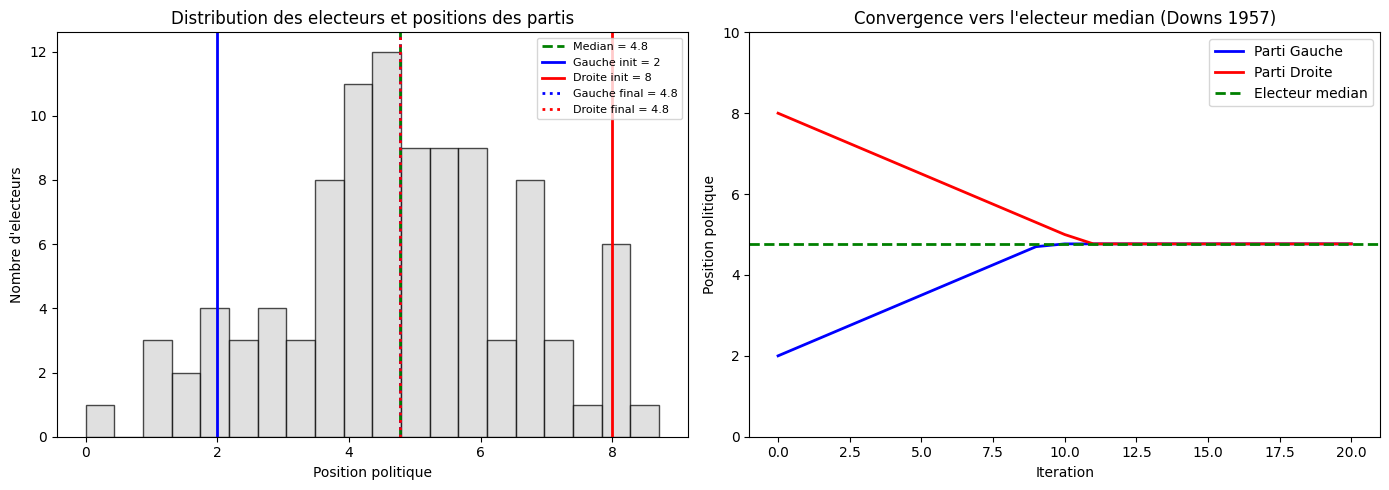

Les deux partis convergent vers la position de l'electeur median!


In [9]:
# Simulation : convergence vers le centre (modele de Downs)
def simulate_two_party_competition(voter_peaks, n_rounds=20):
    """Simule la competition entre deux partis qui ajustent leur position."""
    # Positions initiales des partis
    party_L = 2  # Parti de gauche
    party_R = 8  # Parti de droite
    
    history_L = [party_L]
    history_R = [party_R]
    
    median = sorted(voter_peaks)[len(voter_peaks) // 2]
    
    for _ in range(n_rounds):
        # Chaque parti se rapproche du median pour gagner plus de votes
        if party_L < median:
            party_L = min(party_L + 0.3, median)
        if party_R > median:
            party_R = max(party_R - 0.3, median)
        
        history_L.append(party_L)
        history_R.append(party_R)
    
    return history_L, history_R, median

# Electeurs distribues normalement
np.random.seed(42)
voter_peaks_normal = list(np.random.normal(5, 2, 100).clip(0, 10))

history_L, history_R, median = simulate_two_party_competition(voter_peaks_normal)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution des electeurs
ax1.hist(voter_peaks_normal, bins=20, color='lightgray', edgecolor='black', alpha=0.7)
ax1.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median = {median:.1f}')
ax1.axvline(history_L[0], color='blue', linewidth=2, label=f'Gauche init = {history_L[0]}')
ax1.axvline(history_R[0], color='red', linewidth=2, label=f'Droite init = {history_R[0]}')
ax1.axvline(history_L[-1], color='blue', linewidth=2, linestyle=':', label=f'Gauche final = {history_L[-1]:.1f}')
ax1.axvline(history_R[-1], color='red', linewidth=2, linestyle=':', label=f'Droite final = {history_R[-1]:.1f}')
ax1.set_xlabel('Position politique')
ax1.set_ylabel('Nombre d\'electeurs')
ax1.set_title('Distribution des electeurs et positions des partis')
ax1.legend(loc='upper right', fontsize=8)

# Evolution des positions
rounds = list(range(len(history_L)))
ax2.plot(rounds, history_L, 'b-', linewidth=2, label='Parti Gauche')
ax2.plot(rounds, history_R, 'r-', linewidth=2, label='Parti Droite')
ax2.axhline(median, color='green', linestyle='--', linewidth=2, label='Electeur median')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Position politique')
ax2.set_title('Convergence vers l\'electeur median (Downs 1957)')
ax2.legend()
ax2.set_ylim(0, 10)

plt.tight_layout()
plt.show()

print("Les deux partis convergent vers la position de l'electeur median!")

---

## 6. Cas avec Deux Alternatives

Le theoreme d'Arrow requiert au moins 3 alternatives. Avec seulement 2 alternatives, la regle majoritaire fonctionne parfaitement.

In [10]:
print("AVEC 2 ALTERNATIVES : LA MAJORITE FONCTIONNE")
print("=" * 50)
print("""
Avec 2 alternatives A et B :

Regle majoritaire :
  - A > B socialement ssi majorite prefere A a B

Cette regle satisfait :
  - Pareto : Si tous preferent A, majorite prefere A
  - IIA : Trivial avec 2 alternatives (pas d'autres alternatives)
  - Non-dictature : Aucun individu seul ne decide

=> Le theoreme d'Arrow requiert |A| >= 3

Contre-exemple au paradoxe de Condorcet :
  Avec 2 alternatives, pas de cycle possible!
  A > B ou B > A (relation complete et antisymetrique)
""")

# Demonstration
profile_2alt = [
    ['A', 'B'],  # Individu 1
    ['A', 'B'],  # Individu 2
    ['B', 'A'],  # Individu 3
]

print("Exemple avec 3 electeurs:")
for i, pref in enumerate(profile_2alt):
    print(f"  Individu {i+1}: {' > '.join(pref)}")

winner = pairwise_majority(profile_2alt, 'A', 'B')
print(f"\nResultat majoritaire: {winner} gagne (2 contre 1)")
print("Pas de cycle possible avec 2 alternatives!")

AVEC 2 ALTERNATIVES : LA MAJORITE FONCTIONNE

Avec 2 alternatives A et B :

Regle majoritaire :
  - A > B socialement ssi majorite prefere A a B

Cette regle satisfait :
  - Pareto : Si tous preferent A, majorite prefere A
  - IIA : Trivial avec 2 alternatives (pas d'autres alternatives)
  - Non-dictature : Aucun individu seul ne decide

=> Le theoreme d'Arrow requiert |A| >= 3

Contre-exemple au paradoxe de Condorcet :
  Avec 2 alternatives, pas de cycle possible!
  A > B ou B > A (relation complete et antisymetrique)

Exemple avec 3 electeurs:
  Individu 1: A > B
  Individu 2: A > B
  Individu 3: B > A

Resultat majoritaire: A gagne (2 contre 1)
Pas de cycle possible avec 2 alternatives!


---

## Resume

| Concept | Implementation Python |
|---------|----------------------|
| Paradoxe Condorcet | `check_condorcet_cycle()` |
| Regles de vote | `plurality_rule()`, `borda_rule()`, `copeland_rule()` |
| Preferences unimodales | `single_peaked_preference()` |
| Electeur median | `find_median_voter()` |
| Gagnant Condorcet | `condorcet_winner_single_peaked()` |

**Theoremes cles** :
- **Arrow** : Pas de SWF parfaite avec >= 3 alternatives
- **Sen** : Conflit liberte/Pareto
- **Electeur median** : Avec preferences unimodales, majorite fonctionne

---

**Navigation** : [← GameTheory-16b-Lean-SocialChoice](GameTheory-16b-Lean-SocialChoice.ipynb) | [Index](GameTheory-1-Setup.ipynb) | [GameTheory-15b-Lean-CooperativeGames →](GameTheory-15b-Lean-CooperativeGames.ipynb)